# Song Popularity Classification System

dataset from <https://www.kaggle.com/datasets/vatsalmavani/spotify-dataset>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import seaborn.objects as so

In [2]:
df = pd.read_csv('data/data.csv')
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [3]:
df.tail()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
170648,0.608,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.734,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.637,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.195,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055
170652,0.642,2020,0.13200,"['KEVVO', 'J Balvin']",0.856,189507,0.721,1,7HmnJHfs0BkFzX4x8j0hkl,0.004710,7,0.1820,-4.928,1,Billetes Azules (with J Balvin),74,2020-10-16,0.1080,94.991


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [5]:
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


## Year

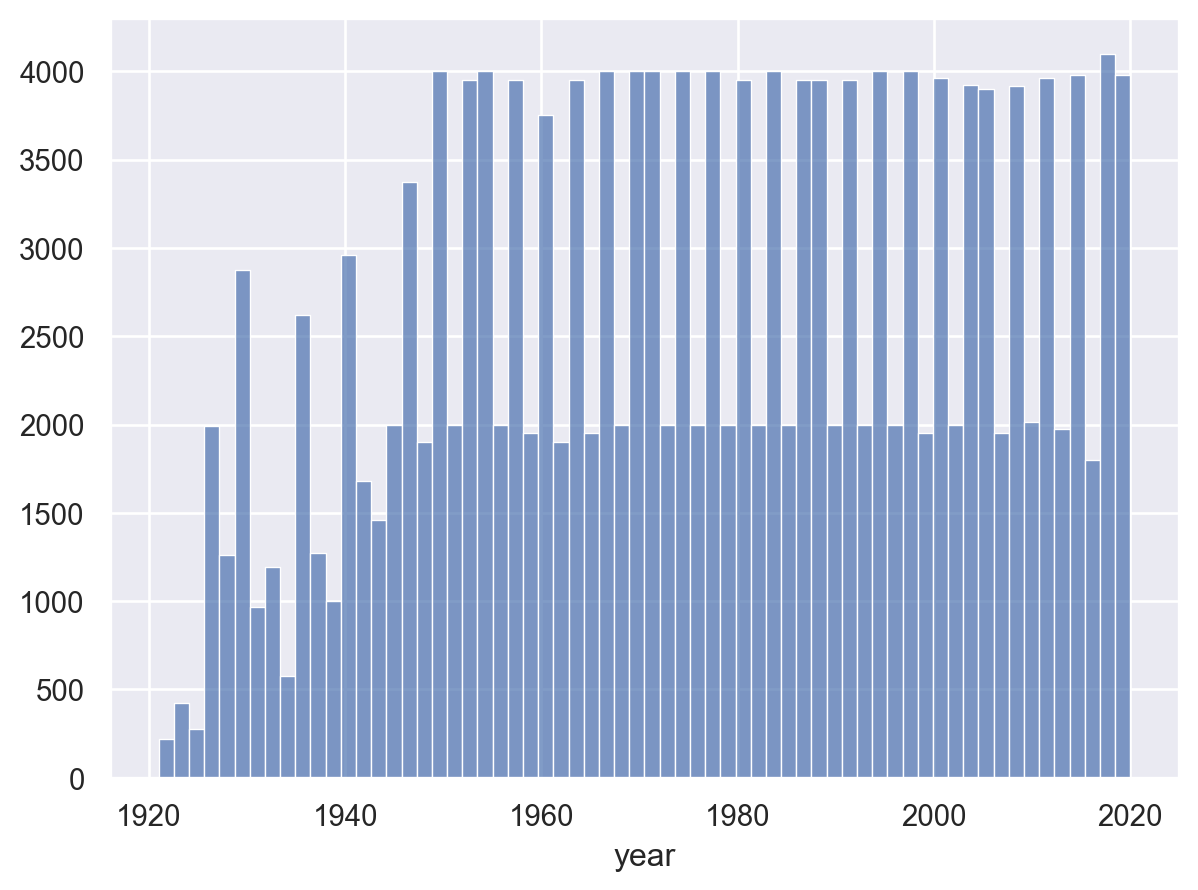

In [6]:
p = so.Plot(df, "year")
p.add(so.Bars(), so.Hist())

In [7]:
top_10_years = df["year"].value_counts(ascending=False).head(10)
print(f' The 10 years with the most releases in our dataset: \n{top_10_years}')

 The 10 years with the most releases in our dataset: 
year
2018    2103
2020    2030
2011    2017
2010    2016
2014    2005
2001    2005
1974    2000
1979    2000
1978    2000
1977    2000
Name: count, dtype: int64


## Valence

The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

In [8]:
df["valence"].describe()

count    170653.000000
mean          0.528587
std           0.263171
min           0.000000
25%           0.317000
50%           0.540000
75%           0.747000
max           1.000000
Name: valence, dtype: float64

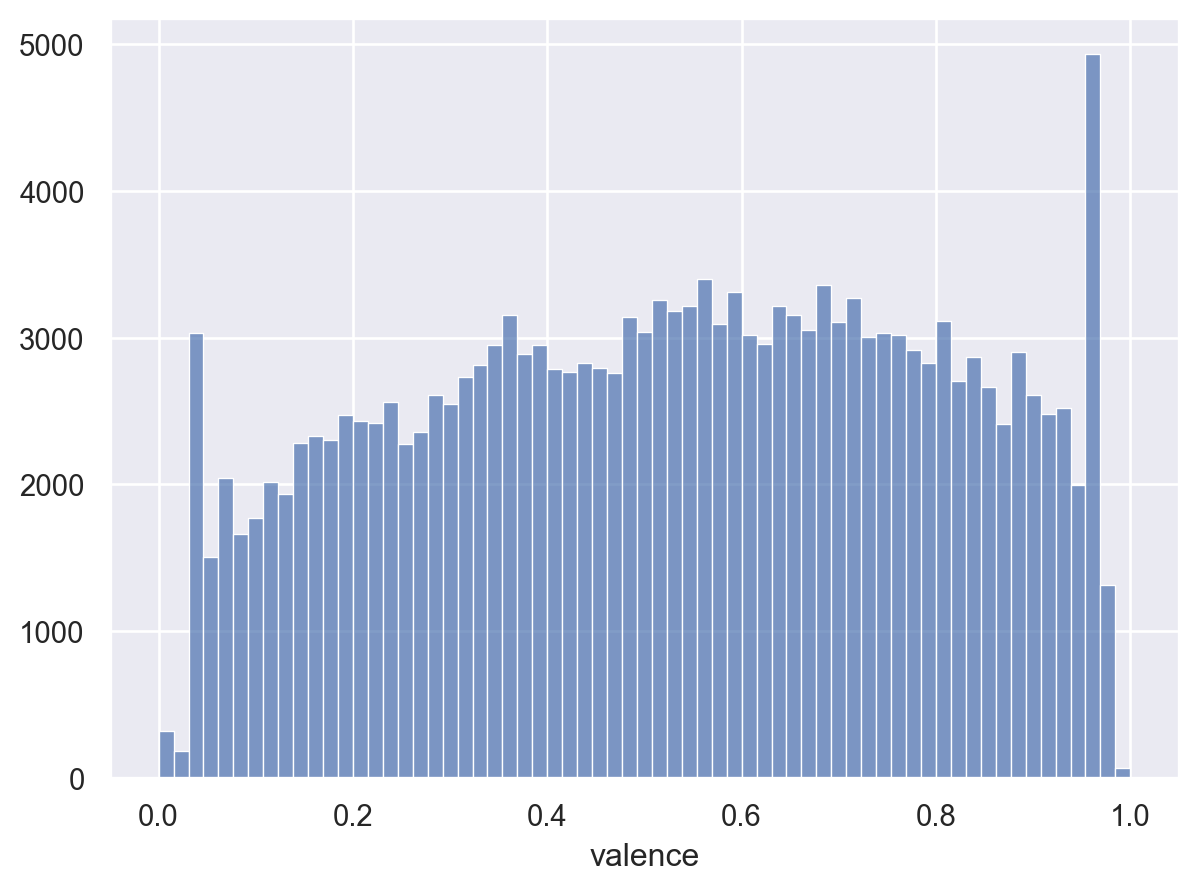

In [9]:
p = so.Plot(df, "valence")
p.add(so.Bars(), so.Hist())

## Acousticness

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

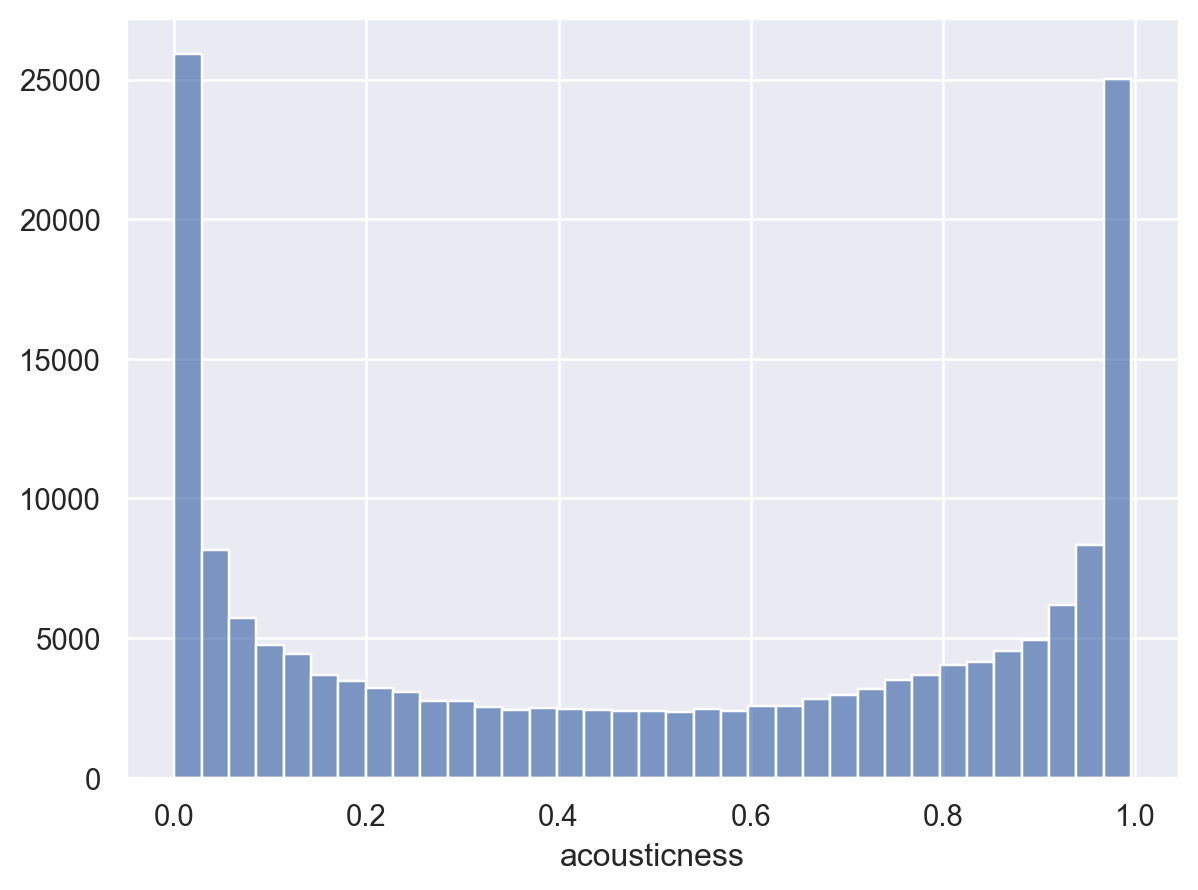

In [10]:
p = so.Plot(df, "acousticness")
p.add(so.Bars(), so.Hist())

## Song Duration

In [11]:
print(f' Average song length: {(df["duration_ms"].mean() / 60000)} minutes')
print(f' Max song length: {(df["duration_ms"].max() / 60000)} minutes')
print(f' Min song length: {(df["duration_ms"].min() / 60000)} minutes')

 Average song length: 3.8491385110917085 minutes
 Max song length: 90.05833333333334 minutes
 Min song length: 0.08513333333333334 minutes


Was going to convert the song duration column but now I'm thinking it's better to leave it in ms for purposes of modeling

In [12]:
'''


# convert milliseconds to seconds
def milliseconds_to_time(milliseconds):
    seconds = milliseconds / 1000
    return pd.to_datetime(seconds, unit='s').time()

# Apply the function to convert milliseconds to time
df['duration'] = df['duration_ms'].apply(milliseconds_to_time)

# Drop the intermediate column
df.drop(columns=['duration_ms'], inplace=True)

df["duration"].describe()

'''

'\n\n\n# convert milliseconds to seconds\ndef milliseconds_to_time(milliseconds):\n    seconds = milliseconds / 1000\n    return pd.to_datetime(seconds, unit=\'s\').time()\n\n# Apply the function to convert milliseconds to time\ndf[\'duration\'] = df[\'duration_ms\'].apply(milliseconds_to_time)\n\n# Drop the intermediate column\ndf.drop(columns=[\'duration_ms\'], inplace=True)\n\ndf["duration"].describe()\n\n'

## Energy

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

In [13]:
df["energy"].describe()

count    170653.000000
mean          0.482389
std           0.267646
min           0.000000
25%           0.255000
50%           0.471000
75%           0.703000
max           1.000000
Name: energy, dtype: float64

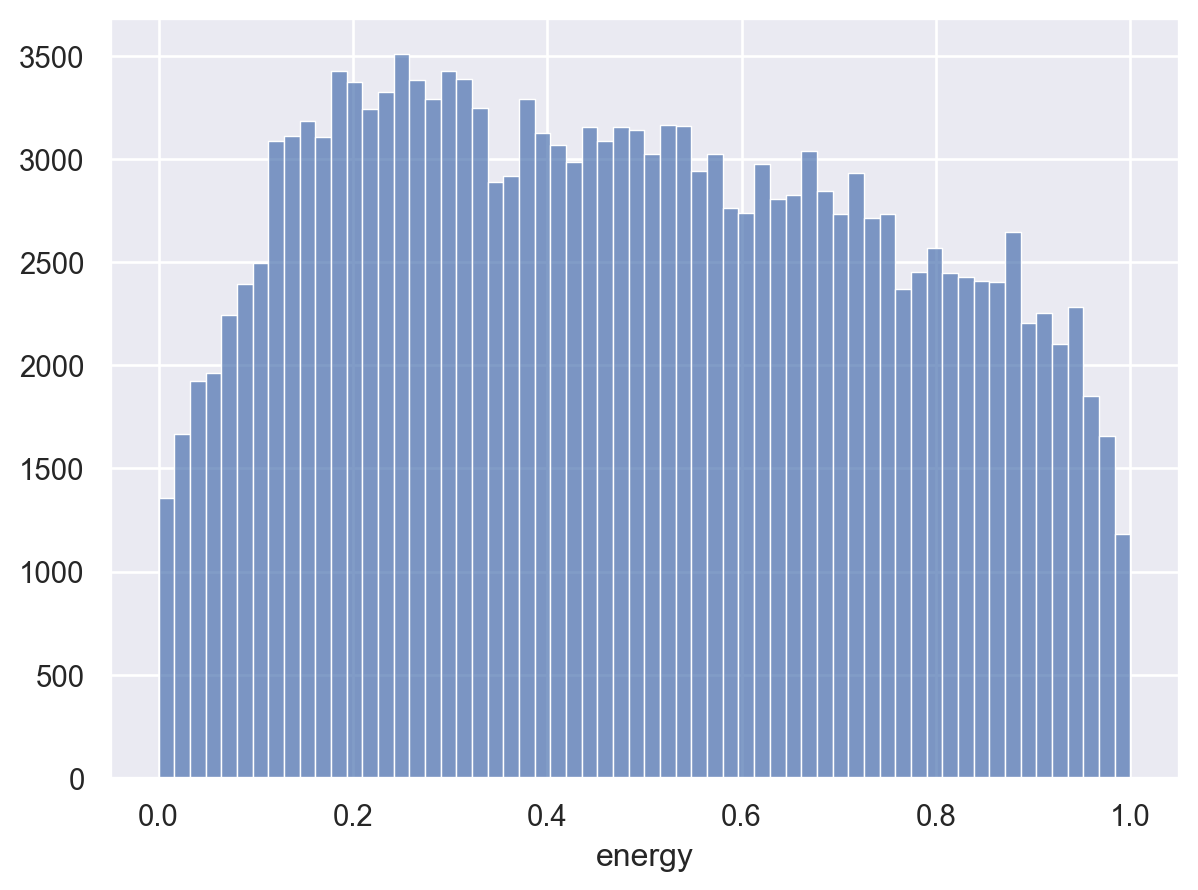

In [14]:
p = so.Plot(df, "energy")
p.add(so.Bars(), so.Hist())

## Instrumentalness

Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

In [15]:
df["instrumentalness"].describe()

count    170653.000000
mean          0.167010
std           0.313475
min           0.000000
25%           0.000000
50%           0.000216
75%           0.102000
max           1.000000
Name: instrumentalness, dtype: float64

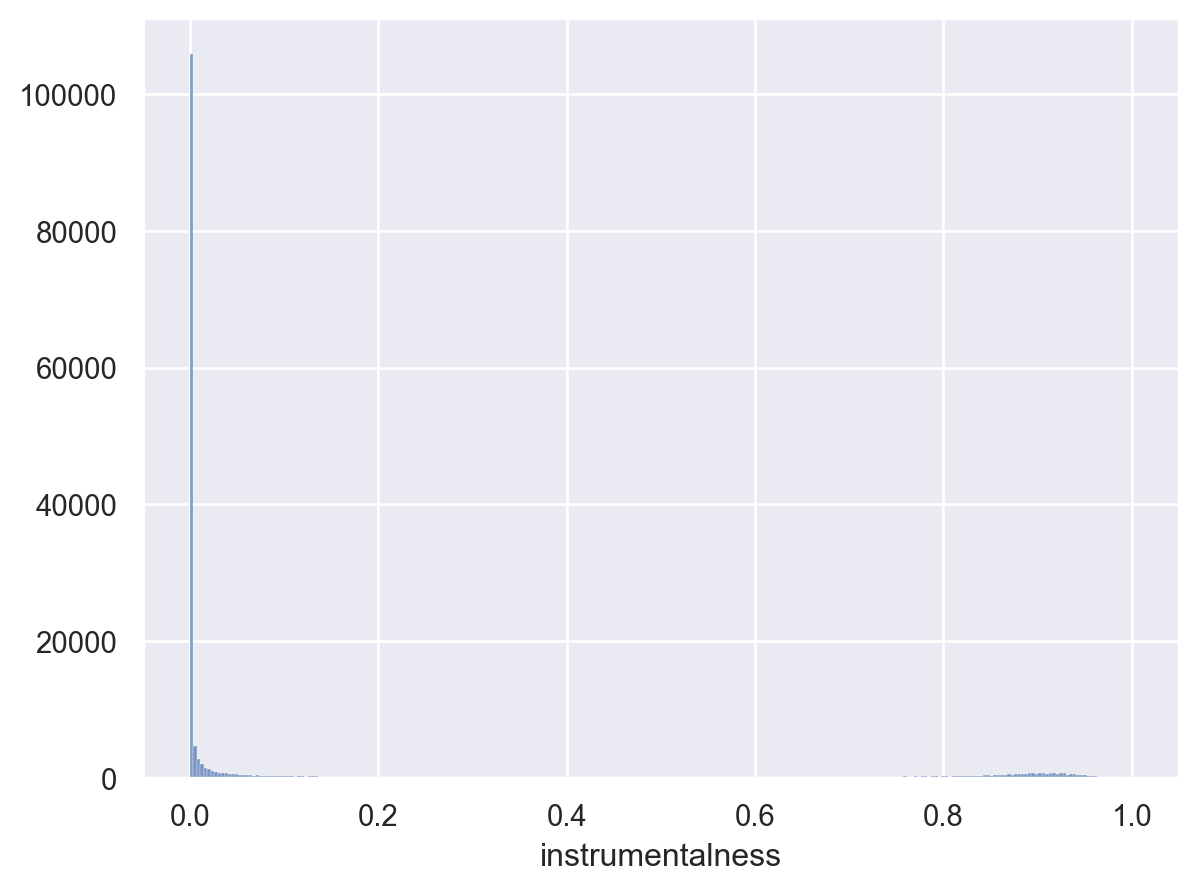

In [16]:
p = so.Plot(df, "instrumentalness")
p.add(so.Bars(), so.Hist())

In [17]:
zero_instrumentalness = df.loc[df["instrumentalness"] == 0]
print(f' Number of songs with an "instrumentalness" measure of zero: {zero_instrumentalness["id"].value_counts().sum()}')

 Number of songs with an "instrumentalness" measure of zero: 46580


## Popularity

In [18]:
df["popularity"].describe()

count    170653.000000
mean         31.431794
std          21.826615
min           0.000000
25%          11.000000
50%          33.000000
75%          48.000000
max         100.000000
Name: popularity, dtype: float64

In [19]:
df.loc[df['popularity'] == 0]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
8,0.721,1921,0.996,['Ignacio Corsini'],0.485,161520,0.1300,0,05xDjWH9ub67nJJk82yfGf,0.151000,5,0.104,-21.508,0,La Mañanita - Remasterizado,0,1921-03-20,0.0483,64.678
9,0.771,1921,0.982,['Fortugé'],0.684,196560,0.2570,0,08zfJvRLp7pjAb94MA9JmF,0.000000,8,0.504,-16.415,1,Il Etait Syndiqué,0,1921,0.3990,109.378
10,0.826,1921,0.995,['Maurice Chevalier'],0.463,147133,0.2600,0,0BMkRpQtDoKjcgzCpnqLNa,0.000000,9,0.258,-16.894,1,Dans La Vie Faut Pas S'en Faire,0,1921,0.0557,85.146
11,0.578,1921,0.994,['Ignacio Corsini'],0.378,155413,0.1150,0,0F30WM8qRpO8kdolepZqdM,0.906000,10,0.110,-27.039,0,Por Que Me Dejaste - Remasterizado,0,1921-03-20,0.0414,70.370
12,0.493,1921,0.990,['Georgel'],0.315,190800,0.3630,0,0H3k2CvJvHULnWChlbeFgx,0.000000,5,0.292,-12.562,0,La Vipère,0,1921,0.0546,174.532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157550,0.578,1954,0.976,"['Richard Strauss', 'Alfred Poell', 'Ludwig We...",0.424,308600,0.4480,0,0yRjRgvO8kR6E9fehn07tE,0.000112,5,0.436,-13.290,1,"Der Rosenkavalier, Op.59 / Act 3: ""Zur Stelle!...",0,1954-01-01,0.0954,82.350
157551,0.960,1954,0.985,['Krosno Ensemble'],0.462,80827,0.0949,0,0yVOxC0rsuYapJh7NkMgkX,0.000000,2,0.885,-23.748,1,Jacôk - Mountain Dancde,0,1954-01-01,0.1050,72.953
157552,0.439,1954,0.420,"['Girolamo Cavazzoni', 'Flor Peeters']",0.138,138427,0.0161,0,0yZj9jxtCYdzkDBX6LGmrL,0.934000,0,0.162,-14.880,0,Easter Hymn,0,1954-05-11,0.0328,70.063
170517,0.394,2020,0.696,['Arijit Singh'],0.420,272562,0.6820,0,5wS1sJr2rzh9AKYFpkqqnA,0.000018,11,0.162,-6.565,0,Jodi Bolo,0,2020-11-16,0.0410,112.009


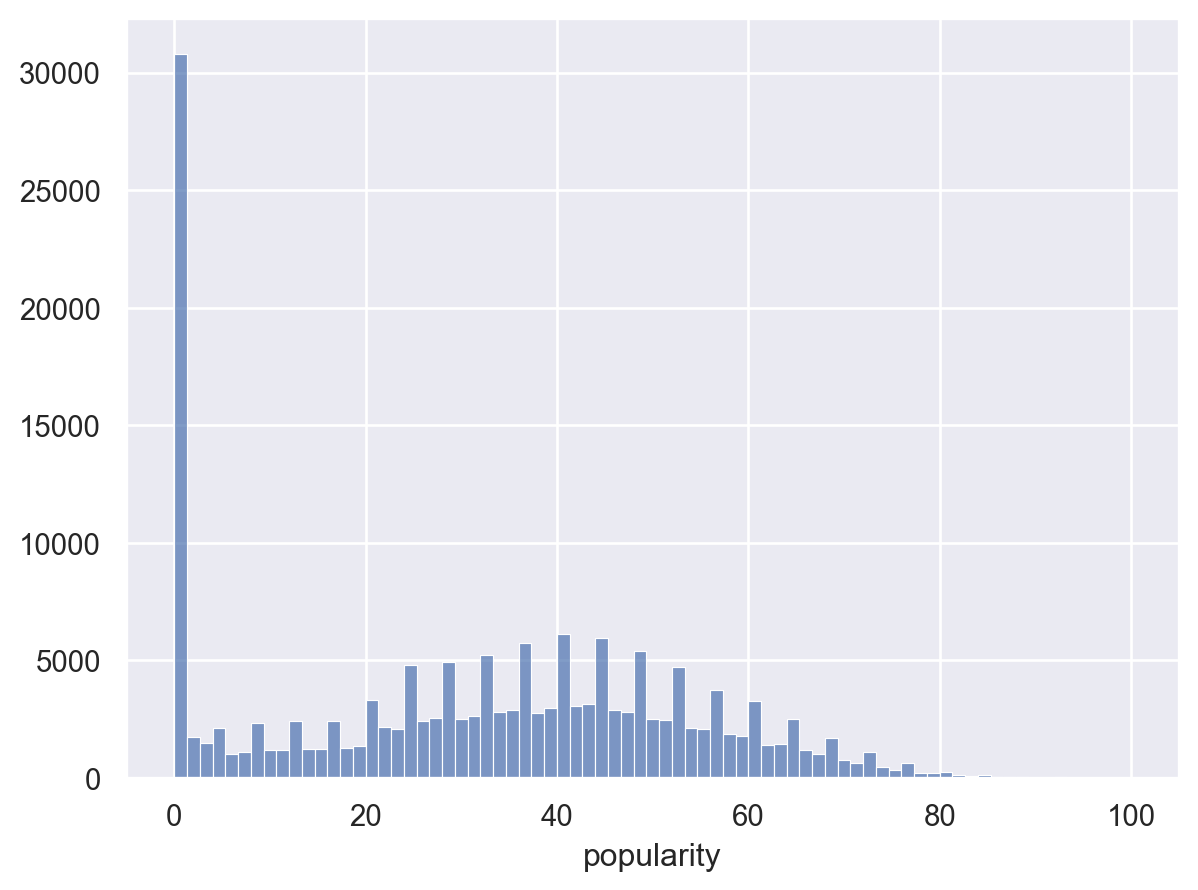

In [20]:
p = so.Plot(df, "popularity")
p.add(so.Bars(), so.Hist())

In [21]:
popularity_100 = df.loc[df["popularity"] == 100]
print(f' Number of songs with an "popularity" measure of 100: {popularity_100["id"].value_counts().sum()}')

popularity_0 = df.loc[df["popularity"] == 0]
print(f' Number of songs with an "popularity" measure of zero: {popularity_0["id"].value_counts().sum()}')

print('Mean "popularity" rating: 31.431794')

 Number of songs with an "popularity" measure of 100: 1
 Number of songs with an "popularity" measure of zero: 27892
Mean "popularity" rating: 31.431794


In [22]:
df.drop(df[df["popularity"] == 0].index, inplace=True)

In [23]:
# sanity check - this should equal 0
df.loc[df["popularity"] ==0]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo


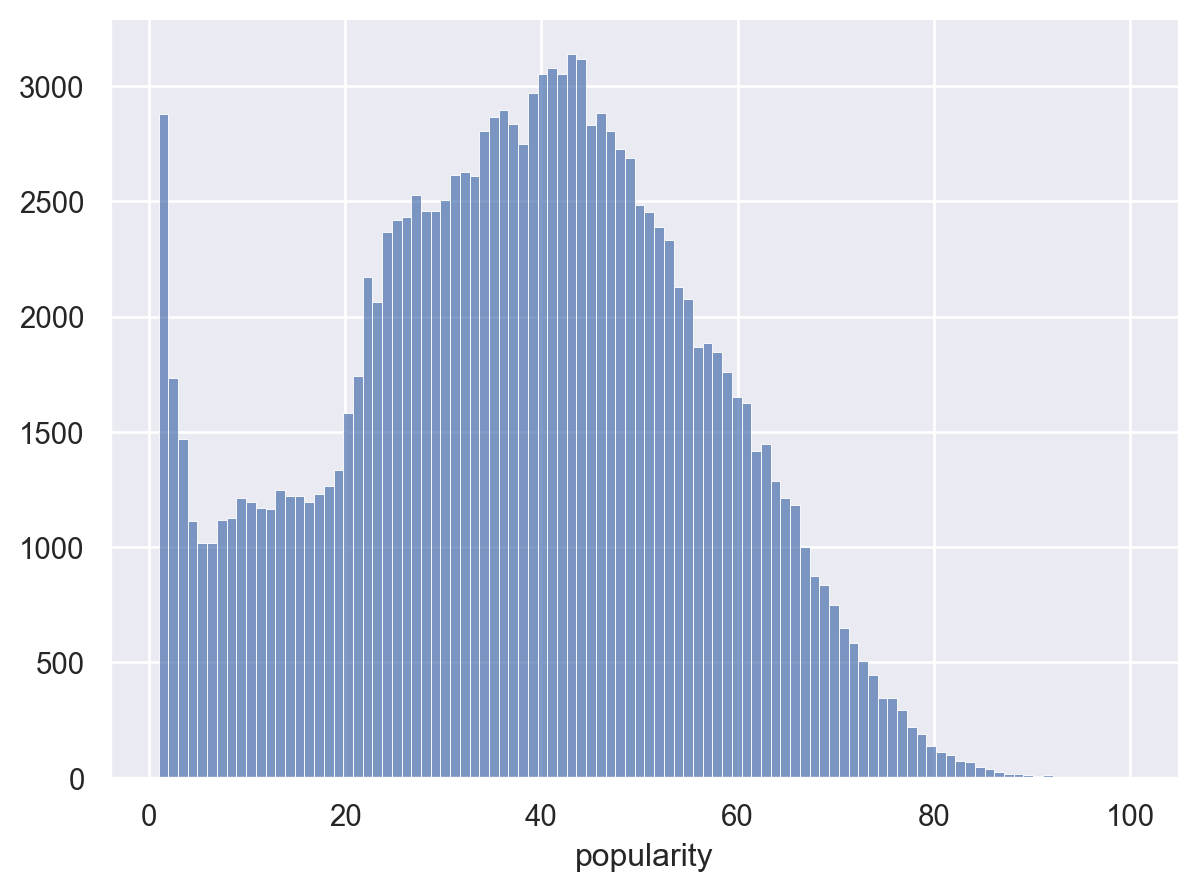

In [24]:
p = so.Plot(df, "popularity")
p.add(so.Bars(), so.Hist())

In [25]:
# Create the 'target' column using list comprehension
df['target'] = [1 if x > 50 else 0 for x in df['popularity']]
df.head(1)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,target
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,0


## Tempo

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

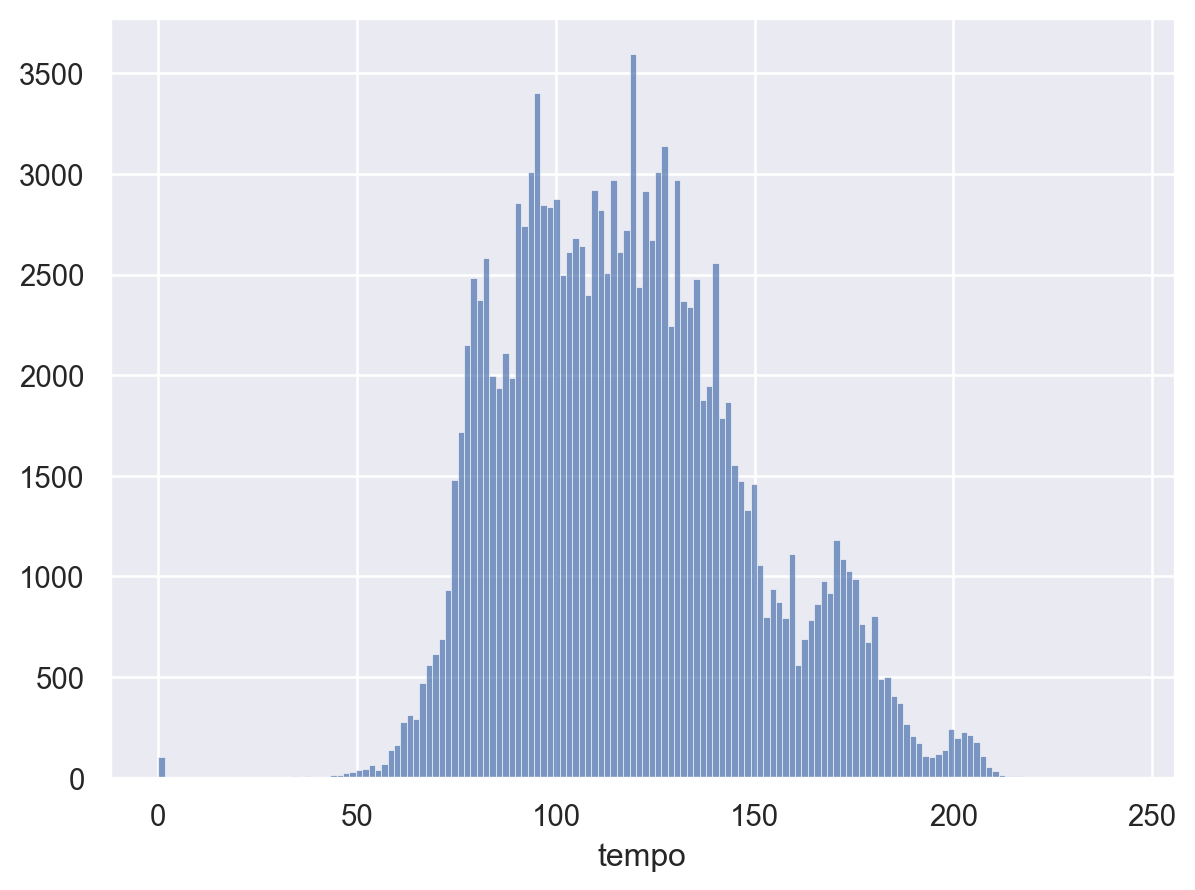

In [26]:
p = so.Plot(df, "tempo")
p.add(so.Bars(), so.Hist())     

## Speechiness

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

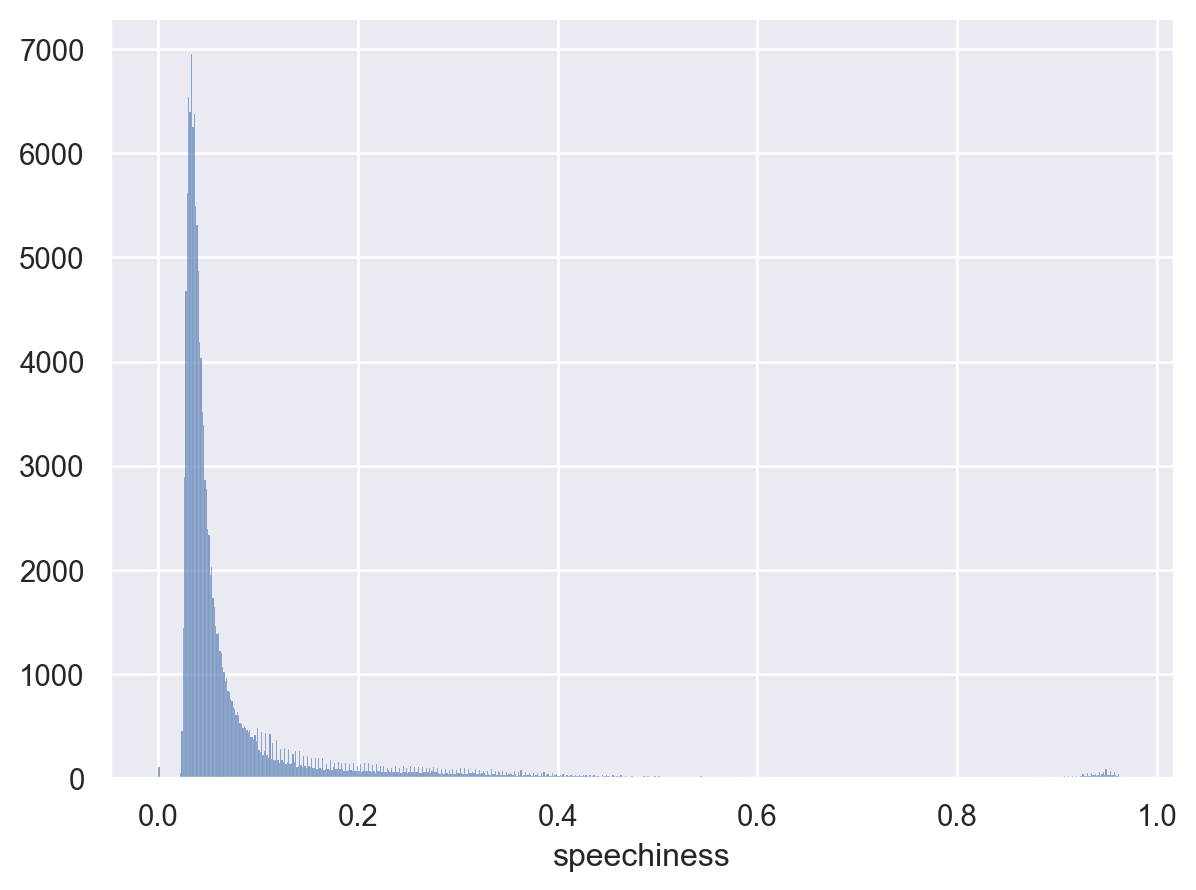

In [27]:
p = so.Plot(df, "speechiness")
p.add(so.Bars(), so.Hist())

In [28]:
df["release_date"].describe()

count     142761
unique     10794
top         1956
freq         947
Name: release_date, dtype: object

## Mode

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

In [29]:
df["mode"].value_counts()

mode
1    101228
0     41533
Name: count, dtype: int64

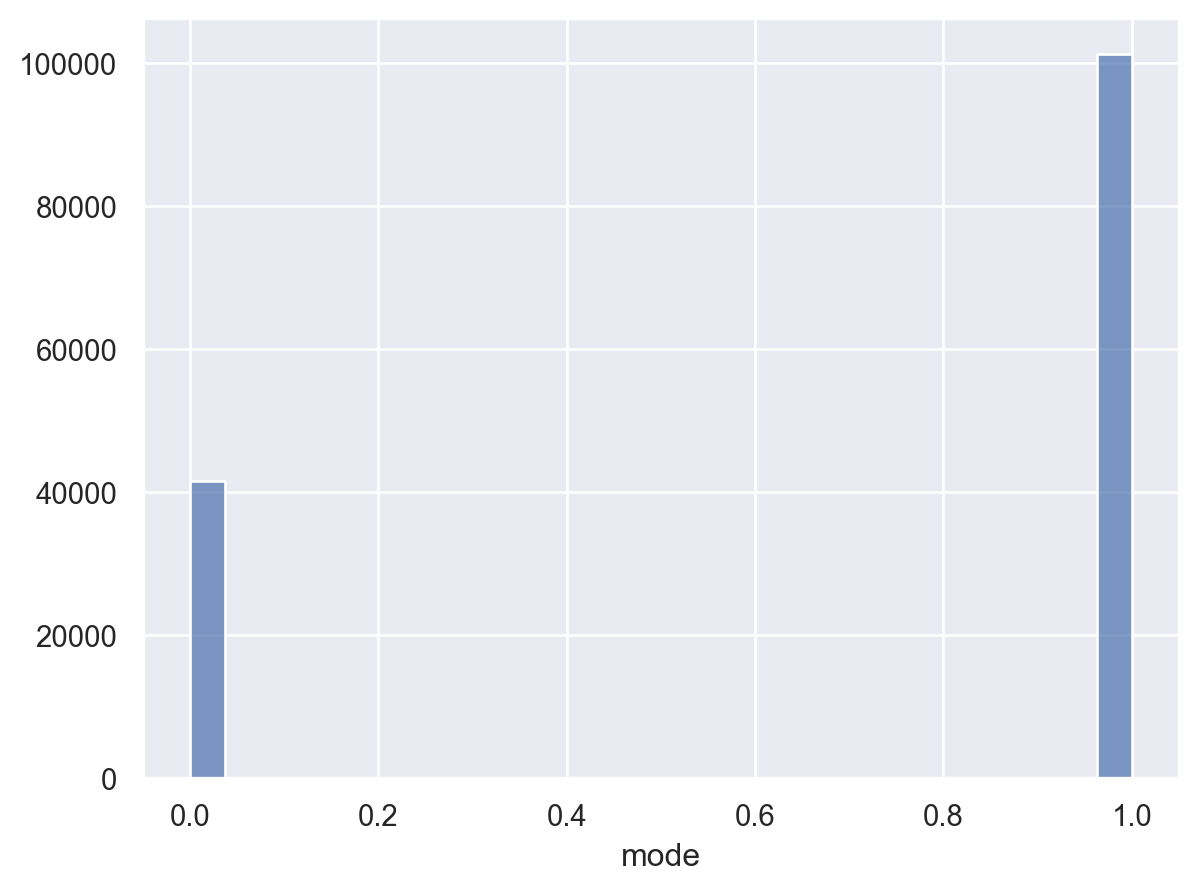

In [30]:
p = so.Plot(df, "mode")
p.add(so.Bars(), so.Hist())

## Loudness

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

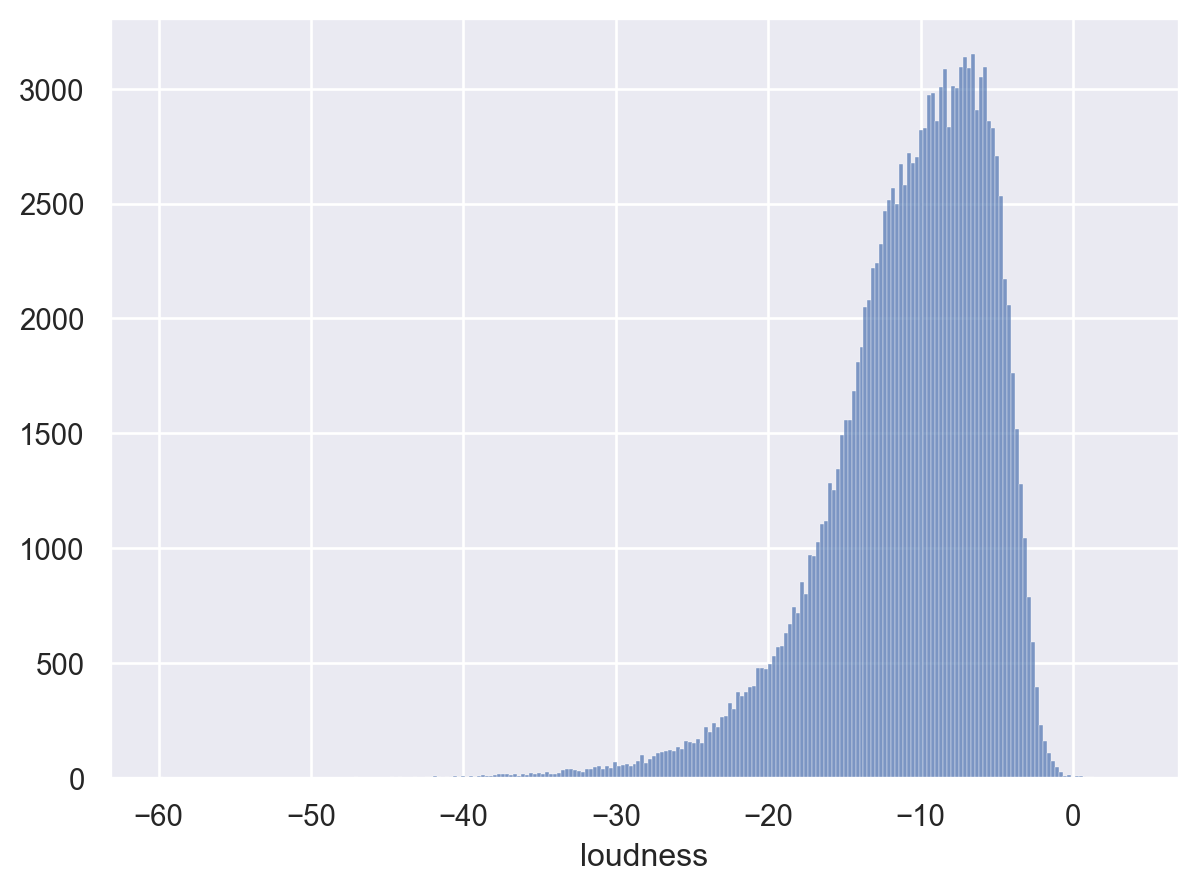

In [31]:
p = so.Plot(df, "loudness")
p.add(so.Bars(), so.Hist())

## Liveness

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

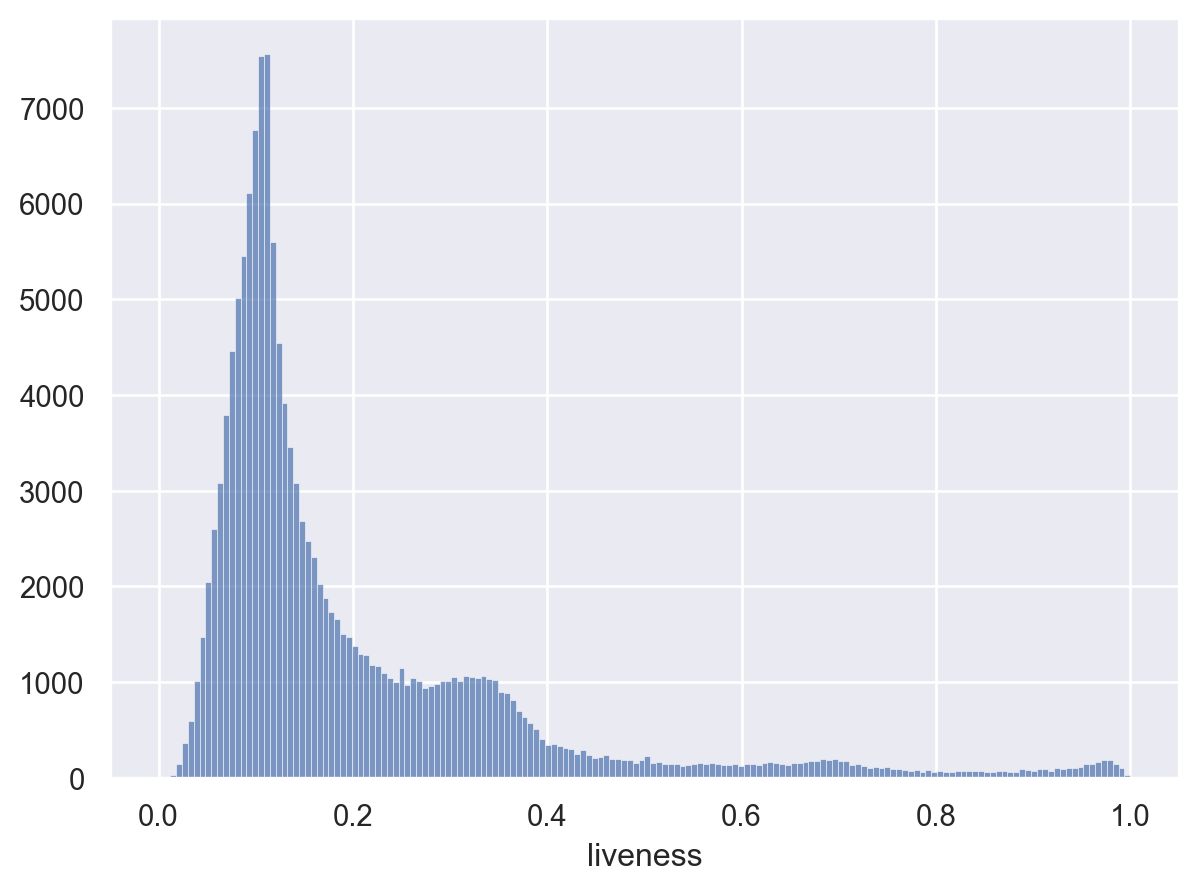

In [32]:
p = so.Plot(df, "liveness")
p.add(so.Bars(), so.Hist())

## Explicit

A marker of whether or not a song is explicit, presumably 0 meaning the song is not explicit, and 1 meaning a song is explicit. 

In [33]:
df["explicit"].value_counts()

explicit
0    130784
1     11977
Name: count, dtype: int64

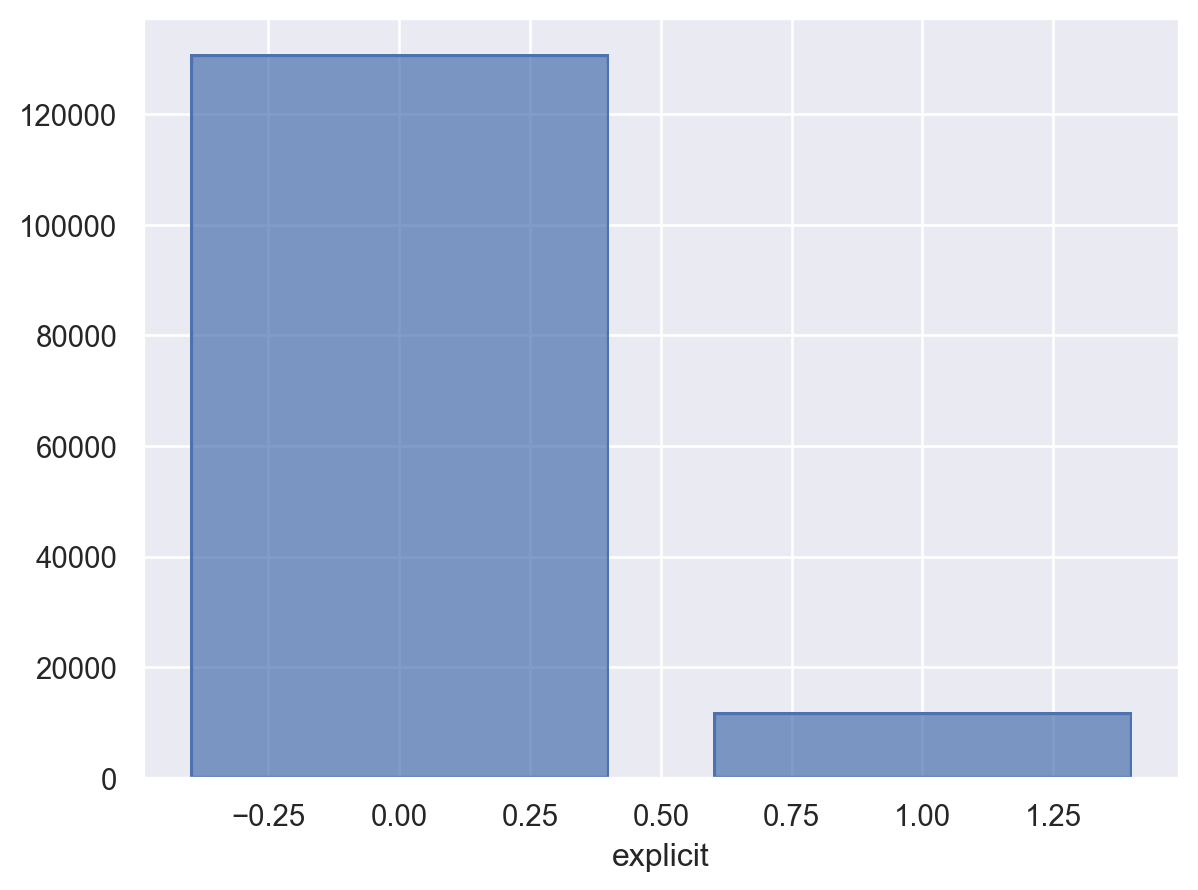

In [34]:
explicit = df["explicit"].value_counts()
so.Plot(x=explicit.index, y=explicit.values).add(so.Bar())

## Key

The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

This is an int but it represents a string so let's change it to not get confused

In [35]:
keys_dict = {0:'C', 1:'C#/Db', 2:'D', 3:'D#/Eb', 4:'E', 5:'F', 6:'F#/Gb', 7:'G', 8:'G#/Ab', 9:'A', 10:'A#/Bb', 11:'B'}
df['key'] = df['key'].map(keys_dict)
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,target
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,A#/Bb,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,0
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,G,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,0
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,D#/Eb,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,0
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,F,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,0
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,D#/Eb,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,0


In [36]:
df["key"]. info()

<class 'pandas.core.series.Series'>
Index: 142761 entries, 0 to 170652
Series name: key
Non-Null Count   Dtype 
--------------   ----- 
142761 non-null  object
dtypes: object(1)
memory usage: 6.2+ MB


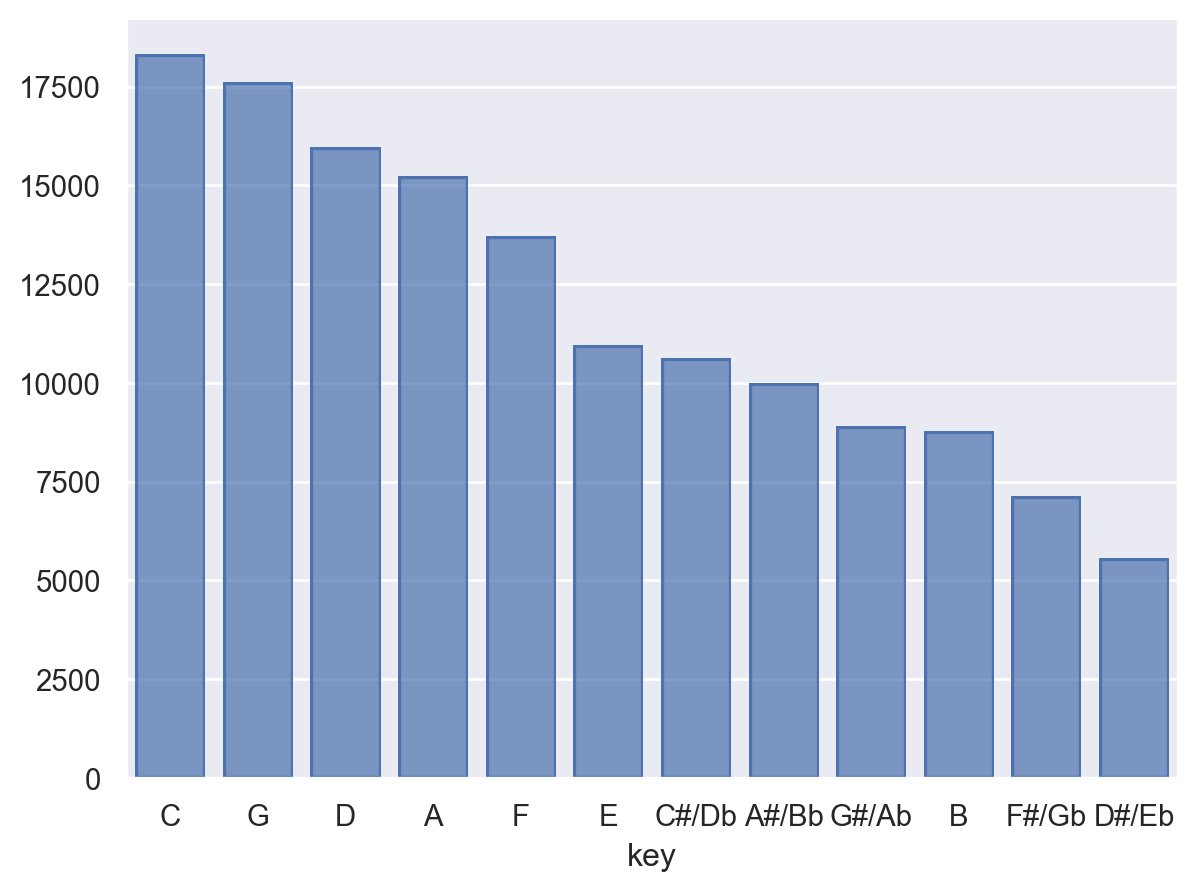

In [37]:
keys = df["key"].value_counts()
so.Plot(x=keys.index, y=keys.values).add(so.Bar())

# Model Preprocessing

In [38]:
# revisiting our dataset to see what features we have
df.head(1)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,target
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,A#/Bb,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,0


In [39]:
df['target'].value_counts(normalize=True)

target
0    0.745827
1    0.254173
Name: proportion, dtype: float64

^^ There's clearly some class imbalance here ... I think we need to SMOTE...

In [40]:
# train test split
from sklearn.model_selection import train_test_split, GridSearchCV

to_drop = ['popularity', 'id', 'artists', 'name', 'release_date', 'year']

X = df.drop(labels= to_drop, axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=27)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107070 entries, 16892 to 6841
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           107070 non-null  float64
 1   acousticness      107070 non-null  float64
 2   danceability      107070 non-null  float64
 3   duration_ms       107070 non-null  int64  
 4   energy            107070 non-null  float64
 5   explicit          107070 non-null  int64  
 6   instrumentalness  107070 non-null  float64
 7   key               107070 non-null  object 
 8   liveness          107070 non-null  float64
 9   loudness          107070 non-null  float64
 10  mode              107070 non-null  int64  
 11  speechiness       107070 non-null  float64
 12  tempo             107070 non-null  float64
 13  target            107070 non-null  int64  
dtypes: float64(9), int64(4), object(1)
memory usage: 12.3+ MB


In [41]:
y_train[:5]

16892     1
38597     1
52021     0
166319    0
25424     0
Name: target, dtype: int64

In [42]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35691 entries, 48077 to 61842
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           35691 non-null  float64
 1   acousticness      35691 non-null  float64
 2   danceability      35691 non-null  float64
 3   duration_ms       35691 non-null  int64  
 4   energy            35691 non-null  float64
 5   explicit          35691 non-null  int64  
 6   instrumentalness  35691 non-null  float64
 7   key               35691 non-null  object 
 8   liveness          35691 non-null  float64
 9   loudness          35691 non-null  float64
 10  mode              35691 non-null  int64  
 11  speechiness       35691 non-null  float64
 12  tempo             35691 non-null  float64
 13  target            35691 non-null  int64  
dtypes: float64(9), int64(4), object(1)
memory usage: 4.1+ MB


# Baseline Model - might delete this since we didn't do any preprocessing, it feels a little irrelevant
let's just do a dummy classifier

In [43]:
from sklearn.dummy import DummyClassifier
# Instantiate the model
dummy_model = DummyClassifier(strategy="most_frequent")

# fitting the model to our newly encoded dataset
dummy_model.fit(X_train, y_train)

# predicting the first 10
dummy_model.predict(X_train)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
# checking the ratio of 1 to 0 in our training set
print(y_train.value_counts(normalize=True))

target
0    0.746372
1    0.253628
Name: proportion, dtype: float64


This tracks that the dummy classifier gave us zeroes as our train and test have basically the same ratio of 0 to 1

# if we use SMOTE we need to use a different pipeline

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#Define preprocessing for numerical and categorical features
numeric_columns = ['valence', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness',	
                   'liveness', 'loudness',	'speechiness',	'tempo']
numeric_transformer = StandardScaler()

cat_columns = ['key']
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, cat_columns)
    ])

In [46]:
#!pip install imblearn

In [47]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score


# Logistic Regression Pipeline with SMOTE and GridSearchCV
pipe_smote = ImPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='auto', random_state=27)),
    ('classifier', LogisticRegression(random_state=0, class_weight='balanced'))
])

In [49]:
pipe_smote.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['valence', 'acousticness',
                                                   'danceability',
                                                   'duration_ms', 'energy',
                                                   'explicit',
                                                   'instrumentalness',
                                                   'liveness', 'loudness',
                                                   'speechiness', 'tempo']),
                                                 ('cat', OneHotEncoder(),
                                                  ['key'])])),
                ('smote', SMOTE(random_state=27)),
                ('classifier',
                 LogisticRegression(class_weight='balanced', random_state=0))])

In [50]:
model = pipe_smote

In [51]:
# actual predictions
y_predict = model.predict(X_test)
y_predict

array([0, 0, 1, ..., 0, 0, 0])

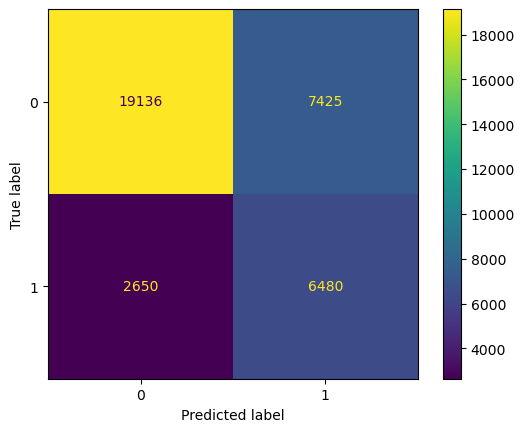

In [52]:
# plotting a confusion matrix to assess our model

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [54]:
print(f"""
Our model's accuracy on the test set is {round(accuracy_score(y_test, y_predict), 2)}.
Our model's recall on the test set is {round(recall_score(y_test, y_predict), 2)}.
Our model's precision on the test set is {round(precision_score(y_test, y_predict), 2)}.
Our model's f1-score on the test is {round(f1_score(y_test, y_predict), 2)}.
""")


Our model's accuracy on the test set is 0.72.
Our model's recall on the test set is 0.71.
Our model's precision on the test set is 0.47.
Our model's f1-score on the test is 0.56.



^^ this is clearly not very good

# Next Steps

another classifier? I'd like to try a recc system as well